In [82]:
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv('results.csv')
df["instance_size"] = df["file"].str.extract(r"knapPI_\d+_(\d+)_\d+_\d+")

In [84]:
df["instance_size"] = df["instance_size"].astype(int)

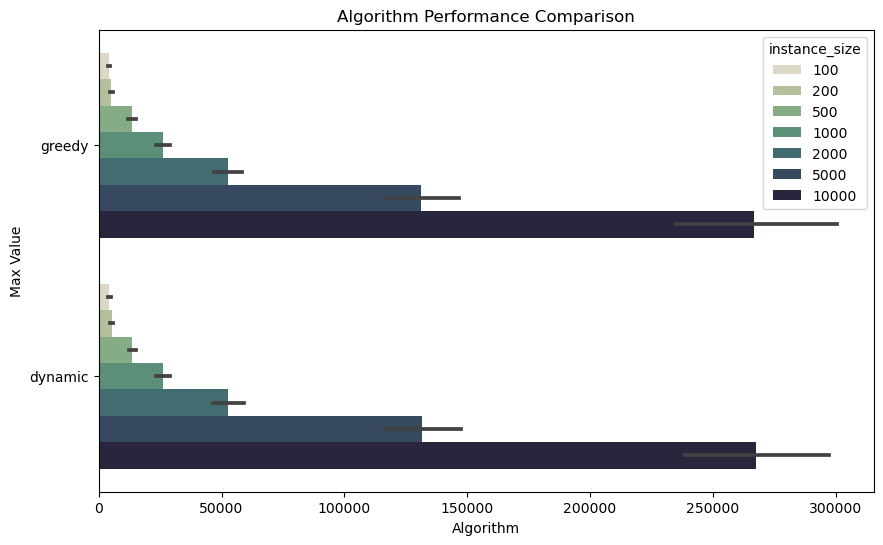

In [85]:
import seaborn as sns
plt.figure(figsize=(10, 6))
# df.boxplot(column="max_value", by="algorithm")
df = df.sort_values(by=['max_value'])
sns.barplot(y="algorithm", x="max_value", data=df, hue="instance_size", \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Algorithm Performance Comparison")
plt.ylabel("Max Value")
plt.xlabel("Algorithm")
plt.show()

In [86]:
df[df['instance_size'] <= 1000]

,file,algorithm,time,max_value,instance_size
1152,knapPI_2_100_1000_1,greedy,0.000052,1487.0,100
942,knapPI_2_100_1000_1,greedy,0.000046,1487.0,100
2202,knapPI_2_100_1000_1,greedy,0.000045,1487.0,100
774,knapPI_2_100_1000_1,greedy,0.000049,1487.0,100
480,knapPI_2_100_1000_1,greedy,0.000046,1487.0,100
...,...,...,...,...,...
2019,knapPI_1_1000_1000_1,dynamic,1.817191,54503.0,1000
1347,knapPI_1_1000_1000_1,dynamic,1.806701,54503.0,1000
633,knapPI_1_1000_1000_1,dynamic,1.790528,54503.0,1000
1515,knapPI_1_1000_1000_1,dynamic,1.782531,54503.0,1000


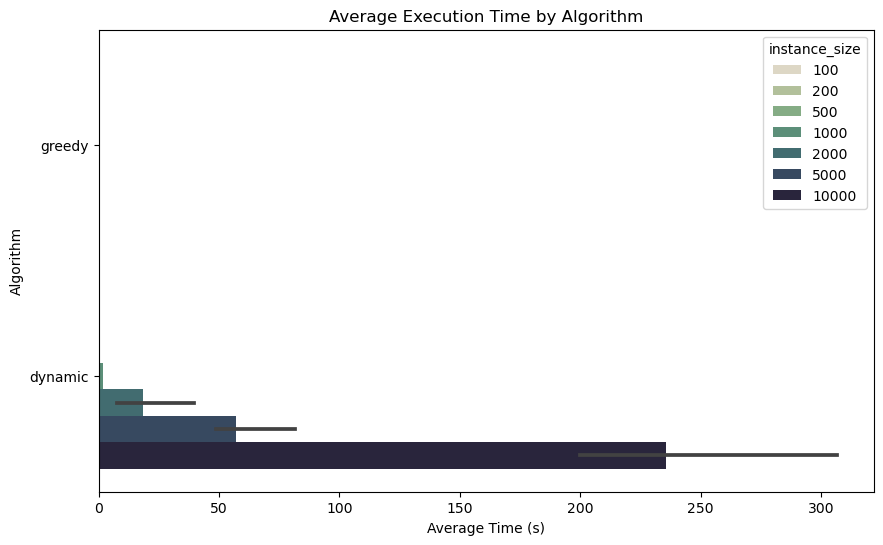

In [87]:
plt.figure(figsize=(10, 6))
sns.barplot(y='algorithm', x="time", data=df, hue=df["instance_size"], \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

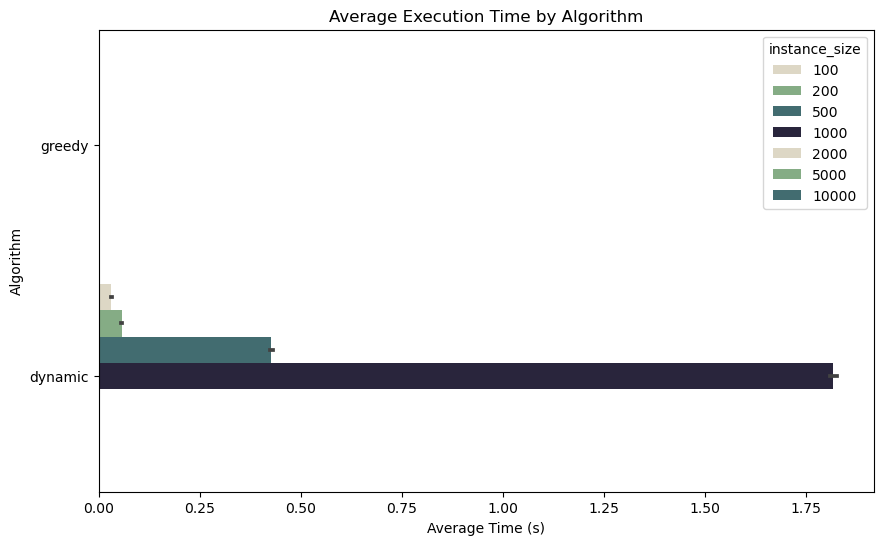

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(y='algorithm', x="time", data=df[df['instance_size'] <= 1000], hue=df["instance_size"], \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=4))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

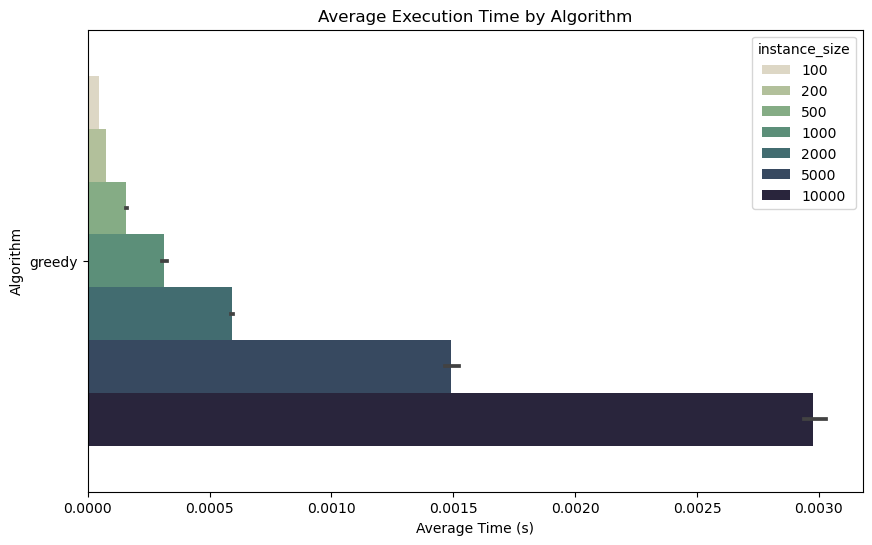

In [89]:
plt.figure(figsize=(10, 6))
filtered_df = df[(df['algorithm'] == 'greedy')]
sns.barplot(y='algorithm', x="time", data=filtered_df, hue="instance_size", \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

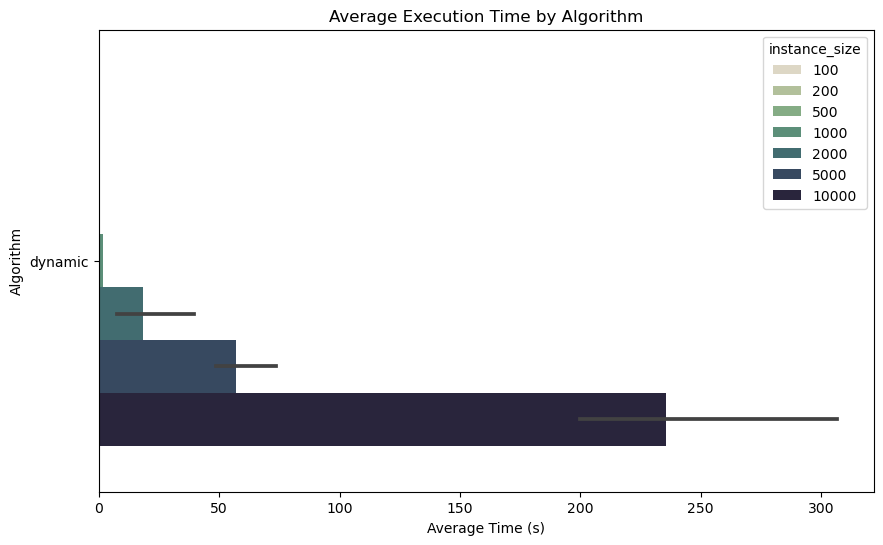

In [92]:
plt.figure(figsize=(10, 6))
filtered_df = df[(df['algorithm'] == 'dynamic')]
sns.barplot(y='algorithm', x="time", data=filtered_df, hue="instance_size", \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

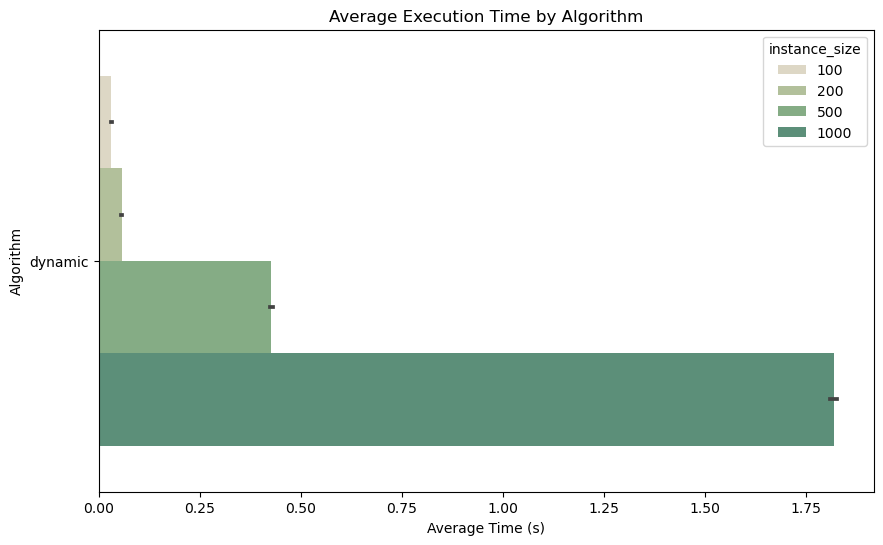

In [93]:
plt.figure(figsize=(10, 6))
filtered_df = df[(df['algorithm'] == 'dynamic') & (df['instance_size'] <= 1000)]
sns.barplot(y='algorithm', x="time", data=filtered_df, hue="instance_size", \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

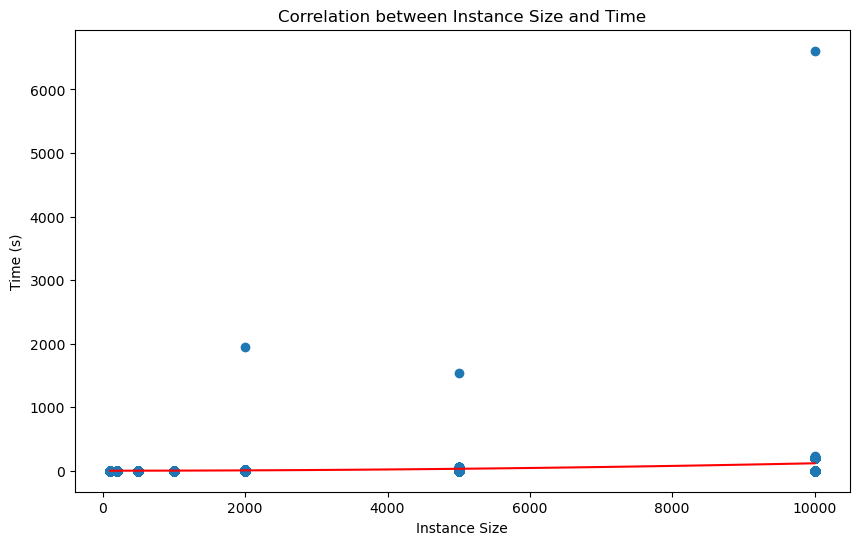

In [90]:
import numpy as np
from scipy.optimize import curve_fit

def polynomial_func(x, a, b, c):
    return a * np.power(x, 2) + b * x + c

popt, _ = curve_fit(polynomial_func, df["instance_size"].astype(int), df["time"])

x_curve = np.linspace(df["instance_size"].astype(int).min(), df["instance_size"].astype(int).max(), 100)

y_curve = polynomial_func(x_curve, *popt)

plt.figure(figsize=(10, 6))
plt.scatter(df["instance_size"].astype(int), df["time"])
plt.plot(x_curve, y_curve, 'r', label="Fitted Curve")
plt.title("Correlation between Instance Size and Time")
plt.xlabel("Instance Size")
plt.ylabel("Time (s)")
plt.show()

In [91]:
df

,file,algorithm,time,max_value,instance_size
1152,knapPI_2_100_1000_1,greedy,0.000052,1487.0,100
942,knapPI_2_100_1000_1,greedy,0.000046,1487.0,100
2202,knapPI_2_100_1000_1,greedy,0.000045,1487.0,100
774,knapPI_2_100_1000_1,greedy,0.000049,1487.0,100
480,knapPI_2_100_1000_1,greedy,0.000046,1487.0,100
...,...,...,...,...,...
2353,knapPI_1_10000_1000_1,dynamic,198.464575,563647.0,10000
1177,knapPI_1_10000_1000_1,dynamic,198.358308,563647.0,10000
2479,knapPI_1_10000_1000_1,dynamic,206.507102,563647.0,10000
1345,knapPI_1_10000_1000_1,dynamic,207.155858,563647.0,10000
